# Proyecto 1

## Integrantes

* Garcia Saavedra Armando
* Mejia Yañez Jose Ehecatl
* Rodriguez Nuñez Diego Eduardo

In [17]:
import numpy as np

In [18]:
import matplotlib.pyplot as plt

In [19]:
import timeit

In [20]:
def merge(arr_i,arr_d):
    i=j=k=0
    arreglo = np.zeros(len(arr_i)+len(arr_d))
    while i < len(arr_i) and j < len(arr_d):
        if arr_i[i] < arr_d[j]:
            arreglo[k] = arr_i[i]
            i += 1
        else:
            arreglo[k] = arr_d[j]
            j += 1
        k += 1

    while i < len(arr_i):
        arreglo[k] = arr_i[i]
        i += 1
        k += 1

    while j < len(arr_d):
        arreglo[k] = arr_d[j]
        j += 1
        k += 1
    return arreglo

In [21]:
def sort(arr):
    if len(arr) <= 1:
        return arr
    
    mid= len(arr) // 2
    arr_i = sort(arr[:mid])
    arr_d = sort(arr[mid:])

    return merge(arr_i,arr_d)

In [22]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivote = arr[0]
        mayor = []
        menor = []
        for i in range(1,len(arr)):
            if arr[i] < pivote:
                menor.append(arr[i])
            else:
                mayor.append(arr[i])
        return quicksort(menor)+[pivote]+quicksort(mayor)

In [23]:
tams = [10,100,1000,10000,1000000,10000000]

In [24]:
mergesort_tiempos = []
quicksort_tiempos = []
numpysort_tiempos = []

In [25]:
for tam in tams:
    arr = np.random.randint(0,100000,tam)
    mergesort_tiempo = timeit.timeit('sort(arr)', number = 1, globals=globals())
    quicksort_tiempo = timeit.timeit('quicksort(arr)', number = 1, globals=globals())
    mergesort_tiempos.append(mergesort_tiempo)
    quicksort_tiempos.append(quicksort_tiempo)

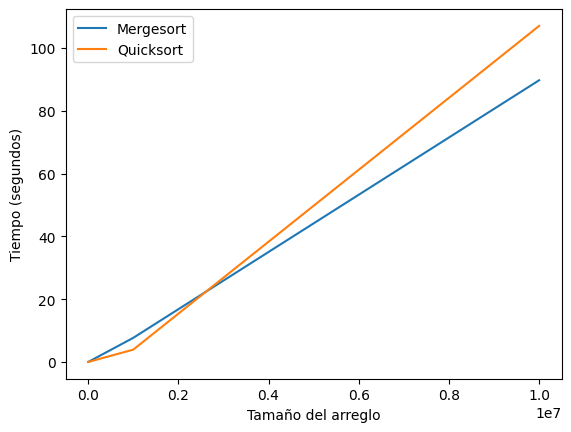

In [26]:
plt.plot(tams,mergesort_tiempos,label='Mergesort')
plt.plot(tams,quicksort_tiempos,label='Quicksort')
plt.xlabel("Tamaño del arreglo")
plt.ylabel("Tiempo (segundos)")
plt.legend()
plt.show()

In [27]:
mergesort_tiempos

[0.0001055000000178552,
 0.00032490000000962027,
 0.003977000000077169,
 0.05367699999999331,
 7.674076600000035,
 89.70048110000005]

In [28]:
quicksort_tiempos

[2.029999996011611e-05,
 0.00010389999999915744,
 0.0011673999999857188,
 0.014633600000024671,
 3.9183811000000333,
 107.00687689999995]

In [29]:
import pandas as pd

In [30]:
data = {
    'Tiempos Mergesort': mergesort_tiempos,
    'Tiempos Quicksort': quicksort_tiempos,
    'Tamaños de los arreglos': tams
}

df= pd.DataFrame(data)
df.set_index('Tamaños de los arreglos',inplace=True)
df

,Tiempos Mergesort,Tiempos Quicksort
Tamaños de los arreglos,,
10,0.000106,0.000020
100,0.000325,0.000104
1000,0.003977,0.001167
10000,0.053677,0.014634
1000000,7.674077,3.918381
10000000,89.700481,107.006877
